참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# Convolutional Neural network (CNN)


## 1. CNN으로 MNIST 분류하기

### 1) 모델 이해하기

- 우리가 만들 모델의 아키텍처를 이해해봅시다.
- 합성곱 신경망은 출처에 따라서 합성곱 층을 부르는 단위가 조금 다릅니다.

#### (a) 첫번째 표기 방법

- 합성곱(`nn.Cov2d`) + 활성화 함수(`nn.ReLU`)를 하나의 합성곱 층으로 보고, 맥스풀링(`nn.MaxPoold2d`)은 풀링 층으로 별도로 명명합니다.

#### (b) 두번째 표기 방법

- 합성곱(`nn.Conv2d`) + 활성화 함수(`nn.ReLU`) + 맥스풀링(`nn.MaxPoold2d`)을 하나의 합성곱 층으로 봅니다.

<br>

- 다시 말해 풀링도 하나의 층으로 보느냐, 안 보느냐의 문제인데 누가 옳고 틀리냐의 문제는 아니므로, 이번 챕터에서는 편의를 위해 맥스풀링까지도 포함해서 하나의 합성곱 층으로 판단하고 정리해보겠습니다.
- 다시 말해 두번째 표기 방법을 택하겠습니다.

<br>

- 모델의 아키텍처는 총 3개의 층으로 구성됩니다.

```
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

### 2) 모델 구현하기

- 위의 3개의 층을 직접 구현해보겠습니다.

#### (a)  필요한 도구 임포트와 입력의 정의

In [13]:
import torch
import torch.nn as nn

- 임의의 텐서를 만듭니다. 텐서의 크기는 1 × 1 × 28 × 28입니다.

In [14]:
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


#### (b) 합성곱층과 풀링 선언하기

- 이제 첫번째 합성곱 층을 구현해봅시다.
- 1채널 짜리를 입력받아서 32채널을 뽑아내는데 커널 사이즈는 3이고 패딩은 1입니다.

In [15]:
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


- 이제 두번째 합성곱 층을 구현해봅시다.
- 32채널 짜리를 입력받아서 64채널을 뽑아내는데 커널 사이즈는 3이고 패딩은 1입니다.

In [16]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


- 이제 맥스풀링을 구현해봅시다.
- 정수 하나를 인자로 넣으면 커널 사이즈와 스트라이드가 둘 다 해당값으로 지정됩니다.

In [20]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


#### 2-2-3) 구현체를 연결하여 모델 만들기

- 지금까지는 선언만한 것이고 아직 이들을 연결시키지는 않았습니다.
- 이들을 연결시켜서 모델을 완성시켜보겠습니다.
- 우선 입력을 첫번째 합성곱층을 통과시키고 합성곱층을 통과시킨 후의 텐서의 크기를 보겠습니다.

In [19]:
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


- 32채널의 28너비 28높이의 텐서가 되었습니다.
- 32가 나온 이유는 conv1의 out_channel로 32를 지정해주었기 때문입니다.
- 또한, 28너비 28높이가 된 이유는 패딩을 1폭으로 하고 3 × 3 커널을 사용하면 크기가 보존되기 때문입니다.
- 이제 이를 맥스풀링을 통과시키고 맥스풀링을 통과한 후의 텐서의 크기를 보겠습니다.

In [21]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


- 32채널의 14너비 14높이의 텐서가 되었습니다.
- 이제 이를 다시 두번째 합성곱층에 통과시키고 통과한 후의 텐서의 크기를 보겠습니다.

In [22]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


- 64채널의 14너비 14높이의 텐서가 되었습니다.
  + 64가 나온 이유는 conv2의 out_channel로 64를 지정해주었기 때문입니다.
  + 또한, 14너비 14높이가 된 이유는 패딩을 1폭으로 하고 3 × 3 커널을 사용하면 크기가 보존되기 때문입니다.
- 이제 이를 맥스풀링을 통과시키고 맥스풀링을 통과한 후의 텐서의 크기를 보겠습니다.

In [23]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


- 이제 이 텐서를 펼치는 작업을 할 겁니다.
- 그런데 펼치기에 앞서 텐서의 n번째 차원을 접근하게 해주는 .size(n)에 대해서 배워보겠습니다.
- 현재 out의 크기는 1 × 64 × 7 × 7입니다.
- out.size(n)은 n번째 차원이 몇인지를 출력합니다.

In [24]:
out.size(0) # 첫번째 차원은 1
out.size(1) # 두번째 차원은 64
out.size(2) # 세번째 차원은 7
out.size(3) # 네번째 차원은 7

7

- 이제 이를 가지고 .view()를 사용하여 텐서를 펼치는 작업을 해보겠습니다.

In [25]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
out = out.view(out.size(0), -1)
print(out.shape) # 1 x (64*7*7)

torch.Size([1, 3136])


- 배치 차원을 제외하고 모두 하나의 차원으로 통합된 것을 볼 수 있습니다.
- 이제 이에 대해서 전결합층(Fully-Connteced layer)를 통과시켜보겠습니다.
- 출력층으로 10개의 뉴런을 배치하여 10개 차원의 텐서로 변환합니다.

In [27]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 10])


### 2-3) CNN으로 MNIST 분류하기

In [28]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# 학습에 사용할 파라미터를 설정합니다.
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# 데이터로더를 사용하여 데이터를 다루기 위해서 데이터셋을 정의해줍니다.
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.2MB/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 459kB/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.24MB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.50MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [31]:
# 데이터로더를 사용하여 배치 크기를 지정해줍니다.
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [32]:
# 이제 클래스로 모델을 설계합니다.
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [33]:
# 모델을 정의합니다.
# CNN 모델 정의
model = CNN().to(device)

In [34]:
# 비용 함수와 옵티마이저를 정의합니다.
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# 총 배치의 수를 출력해보겠습니다.
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

# 총 배치의 수는 600입니다.
# 그런데 배치 크기를 100으로 했으므로 결국 훈련 데이터는 총 60,000개란 의미입니다.

총 배치의 수 : 600


In [36]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        # F(X)
        hypothesis = model(X)

        # cost function
        cost = criterion(hypothesis, Y)

        # optimizer
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.22571072
[Epoch:    2] cost = 0.0630481765
[Epoch:    3] cost = 0.0461973064
[Epoch:    4] cost = 0.0374410041
[Epoch:    5] cost = 0.031195106
[Epoch:    6] cost = 0.0260885637
[Epoch:    7] cost = 0.0218289308
[Epoch:    8] cost = 0.0182061139
[Epoch:    9] cost = 0.0161409732
[Epoch:   10] cost = 0.0129937474
[Epoch:   11] cost = 0.0101262778
[Epoch:   12] cost = 0.00967775844
[Epoch:   13] cost = 0.0077504199
[Epoch:   14] cost = 0.00738966838
[Epoch:   15] cost = 0.00671896851


- 이제 테스트를 해보겠습니다.

In [37]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9854999780654907


## 2. Deep CNN으로 MNIST 분류하기

-  앞서 배운 CNN에 층을 더 추가하여 MNIST를 분류해보겠습니다.

### (1) 모델 이해하기

- 우리가 만들 모델의 아키텍처를 이해해봅시다.
- 모델의 아키텍처는 총 5개의 층으로 구성됩니다.
- 앞서 배운 챕터에서 1번 레이어와 2번 레이어는 동일하되, 새로운 합성곱층과 전결합층을 추가했습니다.

```
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

# 4번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048
전결합층(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어 : 전결합층(Fully-Connected layer)
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

### (2) Deep CNN으로 MNIST 분류하기

In [38]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [40]:
# 학습에 사용할 파라미터를 설정합니다.
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
# 데이터로더를 사용하여 데이터를 다루기 위해서 데이터셋을 정의해줍니다.
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [41]:
# 데이터로더를 사용하여 배치 크기를 지정해줍니다.
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [42]:
# 이제 클래스로 모델을 설계합니다.
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5

        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))

        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [43]:
# 모델을 정의합니다.
# CNN 모델 정의
model = CNN().to(device)

In [44]:
# 비용 함수와 옵티마이저를 정의합니다.
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
# 총 배치의 수를 출력해보겠습니다.
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))
# 총 배치의 수는 600입니다.
# 그런데 배치 크기를 100으로 했으므로 결국 훈련 데이터는 총 60,000개란 의미입니다.

총 배치의 수 : 600


In [46]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.191730991
[Epoch:    2] cost = 0.0536279492
[Epoch:    3] cost = 0.0361461565
[Epoch:    4] cost = 0.0299788006
[Epoch:    5] cost = 0.0233313963
[Epoch:    6] cost = 0.0204635132
[Epoch:    7] cost = 0.0172863733
[Epoch:    8] cost = 0.0157870632
[Epoch:    9] cost = 0.0118815154
[Epoch:   10] cost = 0.0118789691
[Epoch:   11] cost = 0.0107236244
[Epoch:   12] cost = 0.0098212231
[Epoch:   13] cost = 0.00759110181
[Epoch:   14] cost = 0.0087722363
[Epoch:   15] cost = 0.00734576071


- 이제 테스트를 해보겠습니다.

In [47]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


Accuracy: 0.973800003528595


- 층을 더 깊게 쌓았는데 정확도는 큰 차이가 없는 것을 볼 수 있습니다.
- 결국 층을 깊게 쌓는 것도 중요하지만, 꼭 깊게 쌓는 것이 정확도를 올려주지는 않으며 효율적으로 쌓는 것도 중요하다는 의미입니다.

#### >>>> (실습)

- 다음은 너비와 높이가 각각 32 픽셀인 흑백 이미지 데이터입니다. 각 이미지는 사각형, 원형, 또는 삼각형의 모양을 포함하고 있습니다.

- 이 데이터는 다음과 같은 3개의 클래스로 구분됩니다:
  + 클래스 0: 이미지 왼쪽 상단에 위치한 흰색 사각형.
  + 클래스 1: 이미지 중앙에 위치한 흰색 원형.
  + 클래스 2: 이미지 어디에나 위치할 수 있는 흰색 삼각형.

- 이를 CNN 모형을 구현하여 문제를 해결해보세요.

- CNN 모델 구성 :
  + 합성곱 층 1 (Conv Layer 1):
    + 입력 채널: 1 (흑백 이미지)
    + 출력 채널: 16
    + 커널 크기: 3×3
    + 패딩: 1 (이미지 크기를 유지)
    + 활성화 함수: ReLU
  + 풀링 층 1 (Pooling Layer 1):
    + 최대 풀링 (Max Pooling)
    + 커널 크기: 2×2
    + 스트라이드: 2 (이미지를 절반 크기로 축소)
  + 합성곱 층 2 (Conv Layer 2):
    + 입력 채널: 16
    + 출력 채널: 32
    + 커널 크기: 3×3
    + 패딩: 1
    + 활성화 함수: ReLU
  + 풀링 층 2 (Pooling Layer 2):
    + 최대 풀링 (Max Pooling)
    + 커널 크기: 2×2
    + 스트라이드: 2
  + 완전 연결 층 1 (Fully Connected Layer 1):
    + 입력 크기: 32×8×8=2048
    + 출력 크기: 128
    + 활성화 함수: ReLU
  + 완전 연결 층 2 (Fully Connected Layer 2):
    + 입력 크기: 128
    + 출력 크기: 3 (클래스 개수)

- 하이퍼파라미터
  + 옵티마이저: `Adam`
  + 학습률 (Learning Rate): 0.001
  + 배치 크기 (Batch Size): 32
  + 에포크 수 (Number of Epochs): 10


Sample Training Data:


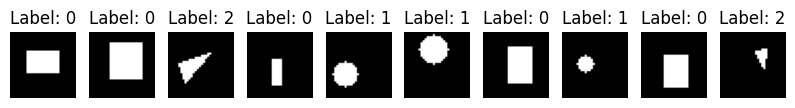

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 1. 데이터 생성
def generate_complex_shapes(num_samples, img_size=32):
    """
    Generate a dataset of images with different shapes:
    - Class 0: Square
    - Class 1: Circle
    - Class 2: Triangle
    """
    data = []
    labels = []

    for _ in range(num_samples):
        img = np.zeros((img_size, img_size), dtype=np.float32)
        shape = np.random.choice(["square", "circle", "triangle"])

        if shape == "square":
            x1, y1 = np.random.randint(4, img_size // 2, size=2)
            x2, y2 = np.random.randint(img_size // 2, img_size - 4, size=2)
            cv2.rectangle(img, (x1, y1), (x2, y2), color=1.0, thickness=-1)
            labels.append(0)

        elif shape == "circle":
            center = np.random.randint(img_size // 4, 3 * img_size // 4, size=2)
            radius = np.random.randint(img_size // 8, img_size // 4)
            cv2.circle(img, tuple(center), radius, color=1.0, thickness=-1)
            labels.append(1)

        elif shape == "triangle":
            pt1 = np.random.randint(4, img_size - 4, size=2)
            pt2 = np.random.randint(4, img_size - 4, size=2)
            pt3 = np.random.randint(4, img_size - 4, size=2)
            pts = np.array([pt1, pt2, pt3], dtype=np.int32)
            cv2.fillPoly(img, [pts], color=1.0)
            labels.append(2)

        data.append(img)

    data = np.expand_dims(np.array(data), axis=1)  # Add channel dimension
    labels = np.array(labels)
    return data, labels

# Generate dataset
X_train, y_train = generate_complex_shapes(1000, img_size=32)
X_test, y_test = generate_complex_shapes(200, img_size=32)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

# 2. DataLoader 설정
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# 4. 학습 데이터 확인 (추가된 부분)
def visualize_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i, 0], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

print("Sample Training Data:")
visualize_samples(X_train.numpy(), y_train.numpy())



Epoch 1/10, Loss: 0.9569
Epoch 2/10, Loss: 0.7242
Epoch 3/10, Loss: 0.5304
Epoch 4/10, Loss: 0.3728
Epoch 5/10, Loss: 0.3338
Epoch 6/10, Loss: 0.2877
Epoch 7/10, Loss: 0.2529
Epoch 8/10, Loss: 0.2201
Epoch 9/10, Loss: 0.1867
Epoch 10/10, Loss: 0.1660
Test Accuracy: 91.00%
Sample Training Data:


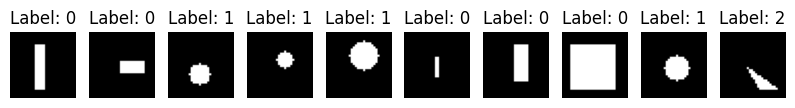

Sample Testing Data:


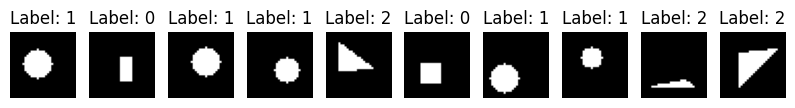

In [ ]:
# -----------------------------------------------------------------------------------------------
# 5. CNN 모델 정의
class ComplexShapeCNN(nn.Module):
    def __init__(self):
        super(ComplexShapeCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 3)  # 3 classes: square, circle, triangle

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 6. 모델 초기화 및 학습 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ComplexShapeCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. 학습 루프
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# 8. 테스트 정확도 계산
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 9. 데이터 및 결과 시각화
def visualize_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i, 0], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

print("Sample Training Data:")
visualize_samples(X_train.numpy(), y_train.numpy())

print("Sample Testing Data:")
visualize_samples(X_test.numpy(), y_test.numpy())
# -----------------------------------------------------------------------------------------------